<center>
    <img width="700" src="https://miro.medium.com/max/2000/1*Fhw7AOH7e0zL4-ikn5NMGw.png" />
</center>

# Quantum-deutsch

This notebook contains a clear and consise comparison of [quantum computing](https://en.wikipedia.org/wiki/Quantum_computing#:~:text=Quantum%20computing%20is%20a%20type,and%20entanglement%2C%20to%20perform%20calculations.&text=The%20study%20of%20quantum%20computing%20is%20a%20subfield%20of%20quantum%20information%20science.) and classical computing

An explanation of [Deutsch’s algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html) and code simulating it using [qiskit](https://qiskit.org/)

***

### Quantum Computing

Quantum computing is a sort of computer that uses the collective features of quantum states to execute calculations, such as superposition, interference, and entanglement. Quantum computing makes use of quantum bits, also known as qubits. Qubit can have the value of both 1 and 0 at the same time. Physical systems like as the spin of an electron or the direction of a photon are used to create qubits. These supercomputers are based on the quantum physics concepts of superposition and entanglement. Quantum entanglement allows qubits to be inextricably connected. Quantum algorithms may be more efficient than their classical counterparts in solving certain computer problems.These supercomputers are based on the quantum physics concepts of superposition and entanglement. 

<center>
    <img width="500" src="https://miro.medium.com/max/1400/1*jA5nMVXf6jyPB2jYIk_PTQ.png" />
    
    Fig 1. Bit and Qubit
    
</center>

<br>

Quantum Computing has the potential to make a significant contribution to the fields of machine learching, artificial intelligence and more. some of the most well-known technological companies involved in Quantum Computing such as Microsoft, Intel, IBM, Google and much more. 

### How does Quantum Computing work?

Quantum computers calculate the probability of an object's condition before it is measured. Operations in quantum computing employ an object's quantum state to generate a qubit. Qubits may have many states at once and hold far more data than a single bit. These are the features of an object that are unspecified before they are identified. Quantum computers are based on two fundamental concepts in quantum physics, Superposition and Entanglement. Superposition refers to the ability to exist in numerous states at once. A quantum computer with many qubits in superposition can process a large number of different possible outputs at the same time.
Quantum entanglement is a sort of superposition that occurs when two or more qubits are in the same state. When two or more qubits are entangled, a change to one of them can have an effect on the others.

### Comparison of Quantum Computing and Classical Computing

Quantum computers use quantum bits, also known as qubits, to manipulate ones and zeros through operations. Quantum computers employ ones and zeros in the same way as classical computers do, but qubits include a third state called "superposition" that enables them to represent a one or a zero at the same time.
Classical computers are ideal for doing normal tasks that require the use of a computer. Quantum computers, on the other hand, are ideal for simulations and data analysis.

| Quantum Computing | | Classical Computing   |
|------|------|------|
| Used by multi-purpose computers and gadgets on a big scale  | | High-speed quantum mechanics-based computers use it |
| There are just two states that are possible: 0 and 1  | | There are an endless amount of states that might exist |
| Boolean Algebra is used to define operations  | | Linear algebra in Hilbert space is used to define operations |
| Ideal for activities such as optimization, data analysis, and simulations  | | Classic computers are best suited for most everyday tasks |
| Mathematical algorithms are used to encrypt data  | | Quantum characteristics are used to encrypt data |

# Deutsch's Algorithm

***

David Deutsch and Richard Jozsa invented the Deutsch–Jozsa algorithm, a deterministic quantum algorithm. One of the first examples of a quantum algorithm that is quicker than any classical algorithm is Deutsch's Algorithm. 

In Deutsch’s algorithm problem, we are given an oracle also referred to as a black box quantum computer that implements some function. Deutsch-Jozsa Problem is confirmed to be either balanced or constant. The oracle is then used to determine if $f$ is constant or balanced.

### Constant Funtion & Balanced Function
The constant function takes in an input and no matter what the input is, it will always output the same result. Given exactly half of all inputs, the balanced function returns 0 and for the other half, it returns 1.

Balanced: $f(0) = 0, f(1) = 1$

Balanced: $f(0) = 1, f(1) = 0$

Constant: $f(0) = 1, f(1) = 1$

Constant: $f(0) = 0, f(1) = 0$

<br>

### Preliminaries

***

#### Qubits

Qubits are represented by two complex numbers. 

Both of these conditions are mutually exclusive. The qubit must either produce a 0 or a 1. Two orthogonal vectors are used to express this in mathematics.

$|0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$|1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$|\psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} =  \alpha |0 \rangle + \beta |1 \rangle $

$\alpha = a + bi \qquad \beta = c + di \qquad a,b,c,d \in \mathbb{R}$

Condition that alpha squared plus beta squared has to be equals to one

$ \alpha^2 + \beta^2 = 1$

<br>

#### Gates

***

##### Hadamard gate
Hadamard gate is a fundemental gate in Deutsch Algorithm. It's a single qubit and it creats a superpositions of: $| 0 \rangle$ and $| 1 \rangle$. Qubit passes through the gate, and then is in both states: 1 and 0. 

<center>
    <img width="200" src="https://miro.medium.com/max/345/1*pJeSr5Bq3l9iWjr9aBEGLQ.png" />
    
    Fig 2. Hadamard gate is represented as this symbol.
</center>

*Hadamard matrix*

$ H = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

*We can see that being performed below:*

$ H | 0 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} =  \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = |+\rangle $

$ H | 1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} =  \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} = |-\rangle $

*Condition that makes matrix valid gate*

$H^* = H^{-1}$

*Conjugate of an entry*

$(a+bi)^* = a-bi$

*Identity matrix also known as I-gate, this gate does nothing.* 

$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $

<br>

#### Measurement

***

Measurement is the operation that is performed on Qubits at the end of a circuit to get the Qubit's final values after the operations have been completed. Quantum measurement reduces the quantum state in an irreversible process. In general, operators can represent the measurements.

<center>
    <img width="200" src="https://miro.medium.com/max/552/1*u_KjpvpvRztY-QP5tQJOTw.png" />
    
    Fig 3. Measurement is represented as this symbol.
</center>

$ |\psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \Leftrightarrow \langle \psi | = \begin{bmatrix} \alpha^* & \beta^* \end{bmatrix} $

##### Probability of measuring $|0 \rangle$ when in $|+ \rangle$:

$|\langle 0 | + \rangle |^2 = |\langle 0 || + \rangle |^2 = | \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} |^2 = |(1)(\frac{1}{\sqrt{2}}) + (0)(\frac{1}{\sqrt{2}})|^2 = (\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

$|a+bi| = \sqrt{(a+bi)(a-bi)} = \sqrt{a^2 + b^2}$

##### Probability of measuring $|1 \rangle$ when in $| - \rangle$:

$|\langle 1 | - \rangle |^2 = |\langle 1 || - \rangle |^2 = | \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} |^2 = |(0)(\frac{1}{\sqrt{2}}) + (1)(-\frac{1}{\sqrt{2}})|^2 = (-\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$
    
##### Probability of measuring $|1 \rangle$ when in $|0 \rangle$:

$|\langle 1 | 0 \rangle |^2 = = | \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} |^2 = |(0)(1) + (1)(0)|^2 = 0$

<br>

#### Multiple qubits

***

First qubit: $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

Second qubit: $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

Together: $|01 \rangle = |0 \rangle \bigotimes |1 \rangle = \begin{bmatrix} 1 \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ 0 \begin{bmatrix} 0 \\ 1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} (1)(0) \\ (1)(1) \\ (0)(1) \\ (0)(0) \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$

<br>

#### CNOT gate

***

The CNOT Gate is a quantum logic gate that is a key component in the building of a quantum computer based on gates.

$CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} $

$CNOT \times |01 \rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = |01 \rangle$

$CNOT \times |10 \rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = |11 \rangle$

<br>

#### Function Oracles

***

Function Oracle is used as an input or output that we don't know whether the function is hidden, constant or balanced. It is also known as *black box*.

$|01 \rangle = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \begin{matrix} |00 \rangle \\ |01 \rangle \\ |10 \rangle \\ |11 \rangle \end{matrix} $

##### Balanced: $f(0) = 0$ and $f(1) = 1$

$ |x,y \rangle \rightarrow |x, y \oplus f(x) \rangle $

$ \begin{matrix} |00 \rangle \\ |01 \rangle \\ |10 \rangle \\ |11 \rangle \end{matrix} \rightarrow \begin{matrix} |00 \rangle \\ |01 \rangle \\ |11 \rangle \\ |10 \rangle \end{matrix}$

##### Constant: $f(0) = 1$ and $f(1) = 1$

$|01 \rangle = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \begin{matrix} |00 \rangle \\ |01 \rangle \\ |10 \rangle \\ |11 \rangle \end{matrix} $

$ |x,y \rangle \rightarrow |x, y \oplus f(x) \rangle $

$ \begin{matrix} |00 \rangle \\ |01 \rangle \\ |10 \rangle \\ |11 \rangle \end{matrix} \rightarrow \begin{matrix} |01 \rangle \\ |00 \rangle \\ |11 \rangle \\ |10 \rangle \end{matrix}$

# Deutsch's Algorithm Performed Using Qiskit

***

https://www.qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html


In [1]:
# Qiskit 
import qiskit

# Aer simulator
import qiskit.providers.aer as aer

# Diagrams
import matplotlib.pyplot as plt

# Random numbers.
import random

# Change pyplot style
plt.style.use('ggplot')

from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

<br>

## Constant Zero Function

***

In [2]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

In [3]:
# Initialise the first qubit to 0 
circuit.initialize([1,0], 0)

In [4]:
# Initialise the second qubit to 1
circuit.initialize([0,1], 1)

In [5]:
# Apply a Hadamard gate to first qubit
circuit.h(0)

In [6]:
# Apply a Hadamard gate to second qubit
circuit.h(1)

In [7]:
# Identity gate
circuit.i(1)

In [8]:
# Apply another Hadamard gate to the first qubit
circuit.h(0)

In [9]:
# Measure the first qubit
circuit.measure(0,0)

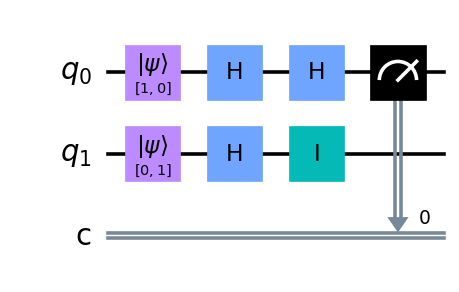

In [10]:
# Draw the circuit
circuit.draw(output='mpl', scale=1.8)

In [11]:
# Create a simulation instance
simulator = aer.QasmSimulator()

In [12]:
# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

In [13]:
# Simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

In [14]:
# Get the results
results = job.result()

In [15]:
# Show the result
counts = results.get_counts()
counts

{'0': 1000}

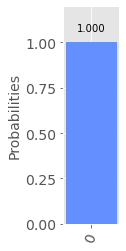

In [16]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

<br>

## Constant one Function

***

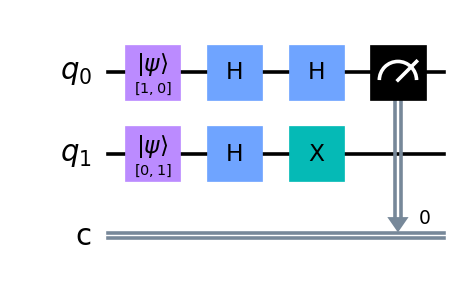

In [17]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to 0 
circuit.initialize([1,0], 0)

# Initialise the second qubit to 1
circuit.initialize([0,1], 1)

# Apply a Hadamard gate to each qubit
circuit.h((0, 1))

# X gate
circuit.x(1)

# Apply another Hadamard gate to the first qubit
circuit.h(0)

# Measure the first qubit
circuit.measure(0,0)

# Draw the circuit
circuit.draw(output='mpl', scale=1.8)

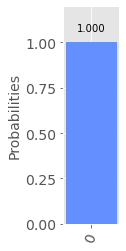

In [18]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# Get the results
results = job.result()

# Show the result
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

<br> 

## Balanced: $f(0) = 0, f(1) = 1$

***

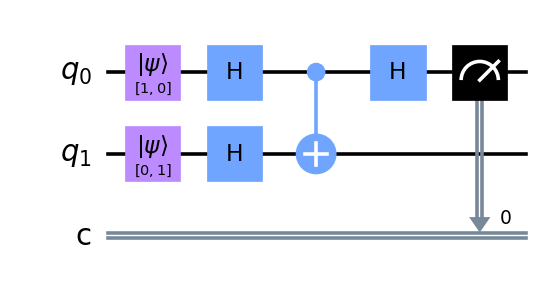

In [19]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to 0 
circuit.initialize([1,0], 0)

# Initialise the second qubit to 1
circuit.initialize([0,1], 1)

# Apply a Hadamard gate to each qubit
circuit.h((0, 1))

# CNOT gate
circuit.cnot(0, 1)

# Apply another Hadamard gate to the first qubit
circuit.h(0)

# Measure the first qubit
circuit.measure(0,0)

# Draw the circuit
circuit.draw(output='mpl', scale=1.8)

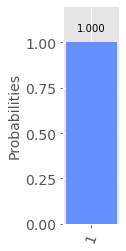

In [20]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# Get the results
results = job.result()

# Show the result
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

<br> 

## Balanced: $f(0) = 1, f(1) = 0$

***

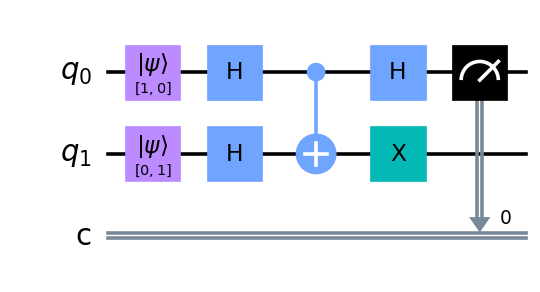

In [21]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to 0 
circuit.initialize([1,0], 0)

# Initialise the second qubit to 1
circuit.initialize([0,1], 1)

# Apply a Hadamard gate to each qubit
circuit.h((0, 1))

# CNOT gate
circuit.cnot(0, 1)

# Apply x to second qubit
circuit.x(1)

# Apply another Hadamard gate to the first qubit
circuit.h(0)

# Measure the first qubit
circuit.measure(0,0)

# Draw the circuit
circuit.draw(output='mpl', scale=1.8)

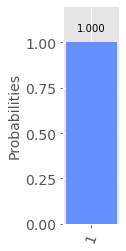

In [22]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# Get the results
results = job.result()

# Show the result
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

# Deutsch's Algorithm with Random Function

***

In [23]:
# Return a random (part of) circuit - implementing the quantum oracle for f.

def random_f():
    # Create a circuit with 2 qubits, 1 classical bit.
    circuit = qiskit.QuantumCircuit(2, 1)
    
    # Pick one randomly out of the four functions.
    f_number = random.randint(1, 4)
    
    # 1: Constant 0 function
    # 2: Constant 1 function
    # 3: Balanced identity function
    # 4: Constant not identity function
    
    # 1: f(0) = f(1) = 0.
    if f_number == 1:
        circuit.i(1)
    # 2: f(0) = f(1) = 1.
    elif f_number == 2:
        circuit.x(1)
    # 3: f(0) = 0, f(1) = 1.
    elif f_number == 3:
        circuit.cnot(0, 1)
    # 4: f(0) = 1, f(1) = 0.
    elif f_number == 4:
        circuit.cnot(0, 1)
        circuit.x(1)
    else:
        print("Error!")
        
    # Return the circuit.
    return circuit

<br> 

## First Part of Circuit

***

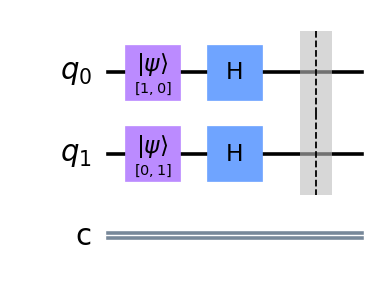

In [24]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

# Separate parts of circuit.
circuit.barrier()

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

<br> 

## Second Part of Circuit

***

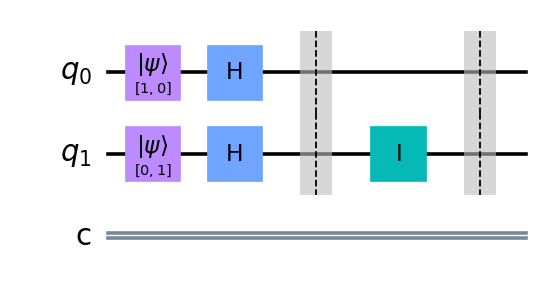

In [25]:
# Append the random_f() circuit to circuit.
circuit.compose(random_f(), inplace=True)

# Separate parts of circuit.
circuit.barrier()

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

<br> 

## Third Part of Circuit

***

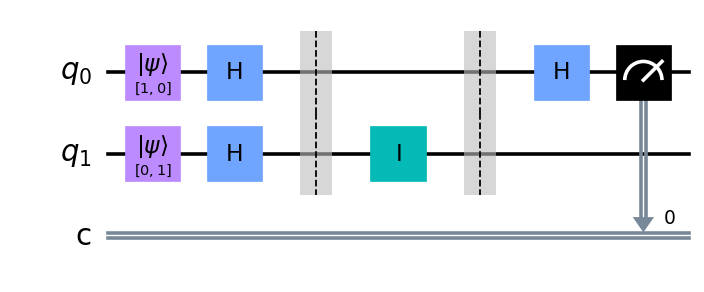

In [26]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

<br> 

## Simulate and decide

***

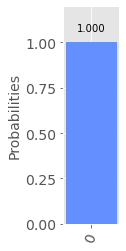

In [27]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Results

Random function randomly decides one of the 4 functions: *1. Constant 0 function, 2. Constant 1 function, 3. Balanced identity function and 4. Constant not identity function*. Then create the first part of the circuit, the first qubit in state 0, second qubit in state 1 and 2 Hadamard gates one on each. In the second part of the circuit, the random piece is added, and finally which always happens, the Hadamard gate on the last qubit. In the end, simulate the circuit 1000 times and decide whether it's balanced **(1)** or constant **(0)**.

### Conclusion

After performing the above demonstration, we can tell that Quantum computing can do things more efficiently than a Classical Computer. In Quantum computing it can decide whether it’s constant or balanced by calling the function once whereas in Classical Computer has to call it twice to determine whether the function is constant or balanced. 

### Refrences 

- [Quantum computing](https://en.wikipedia.org/wiki/Quantum_computing#:~:text=Quantum%20computing%20is%20a%20type,and%20entanglement%2C%20to%20perform%20calculations.&text=The%20study%20of%20quantum%20computing%20is%20a%20subfield%20of%20quantum%20information%20science.)
- [Quantum vs Classical Computing](https://www.cbinsights.com/research/quantum-computing-classical-computing-comparison-infographic/)
- [Deutsch Algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)
- [Qiskit](https://qiskit.org/)
- [Circuit in qiskit Lab Video](https://web.microsoftstream.com/video/36de0eb8-c03e-40d5-b1c7-d172b1083196)
- [Qubits, Gates, and Measurement Lab Video](https://web.microsoftstream.com/video/7868a50b-b8d9-4fcc-a857-ba1615a4a49b)
- [Multiple Qubits Lab Video](https://web.microsoftstream.com/video/dce636c4-6ec9-42b1-b5a9-123959dbbcca)
- [Random Quantum Functions Lab Video](https://web.microsoftstream.com/video/b547005d-e3a1-4707-860e-16c254ef87bf)
- [Hadamard Gate](https://freecontent.manning.com/all-about-hadamard-gates/)
- [Multiple Qubits](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html)
- [CNOT Gate](https://en.wikipedia.org/wiki/Controlled_NOT_gate)
- [Function Oracle](https://www.qmunity.tech/tutorials/deutschs-algorithm)

# Images

Images were taken from the link below

- [Quantum Computing Image](https://medium.com/analytics-vidhya/variational-quantum-eigensolver-from-scratch-finding-ground-state-energy-of-hamiltonian-a5c13d5268f1)
- [Bit and Qubit Image](https://towardsdatascience.com/quantum-computing-with-colorful-diagrams-8f7861cfb6da)
- [Measurement Image](https://towardsdatascience.com/quantum-computing-with-colorful-diagrams-8f7861cfb6da)
- [Hadamard Gate Image](https://towardsdatascience.com/quantum-computing-with-colorful-diagrams-8f7861cfb6da)

### End 

***